In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
test = pd.read_csv('../datasets/test.csv')
# to read in the test dataset and convert it into a pd

In [3]:
train = pd.read_csv('../datasets/train.csv')
# to read in the train dataset and convert it into a pd

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

** will deal with numerical and categorical data separately**


## Data Cleaning: initial check

In [4]:
test.head()
#to look at the top 5 rows of test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.head()
#to look at the top 5 rows of train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
obj =test.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
# to check for null values in each columns of test, not just the summary

Id , 0
PID , 0
MS SubClass , 0
MS Zoning , 0
Lot Frontage , 160
Lot Area , 0
Street , 0
Alley , 821
Lot Shape , 0
Land Contour , 0
Utilities , 0
Lot Config , 0
Land Slope , 0
Neighborhood , 0
Condition 1 , 0
Condition 2 , 0
Bldg Type , 0
House Style , 0
Overall Qual , 0
Overall Cond , 0
Year Built , 0
Year Remod/Add , 0
Roof Style , 0
Roof Matl , 0
Exterior 1st , 0
Exterior 2nd , 0
Mas Vnr Type , 1
Mas Vnr Area , 1
Exter Qual , 0
Exter Cond , 0
Foundation , 0
Bsmt Qual , 25
Bsmt Cond , 25
Bsmt Exposure , 25
BsmtFin Type 1 , 25
BsmtFin SF 1 , 0
BsmtFin Type 2 , 25
BsmtFin SF 2 , 0
Bsmt Unf SF , 0
Total Bsmt SF , 0
Heating , 0
Heating QC , 0
Central Air , 0
Electrical , 1
1st Flr SF , 0
2nd Flr SF , 0
Low Qual Fin SF , 0
Gr Liv Area , 0
Bsmt Full Bath , 0
Bsmt Half Bath , 0
Full Bath , 0
Half Bath , 0
Bedroom AbvGr , 0
Kitchen AbvGr , 0
Kitchen Qual , 0
TotRms AbvGrd , 0
Functional , 0
Fireplaces , 0
Fireplace Qu , 422
Garage Type , 44
Garage Yr Blt , 45
Garage Finish , 45
Garage Cars , 

In [7]:
train.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
# to check for null values in each columns of train, not just the summary

Id , 0
PID , 0
MS SubClass , 0
MS Zoning , 0
Lot Frontage , 160
Lot Area , 0
Street , 0
Alley , 821
Lot Shape , 0
Land Contour , 0
Utilities , 0
Lot Config , 0
Land Slope , 0
Neighborhood , 0
Condition 1 , 0
Condition 2 , 0
Bldg Type , 0
House Style , 0
Overall Qual , 0
Overall Cond , 0
Year Built , 0
Year Remod/Add , 0
Roof Style , 0
Roof Matl , 0
Exterior 1st , 0
Exterior 2nd , 0
Mas Vnr Type , 1
Mas Vnr Area , 1
Exter Qual , 0
Exter Cond , 0
Foundation , 0
Bsmt Qual , 25
Bsmt Cond , 25
Bsmt Exposure , 25
BsmtFin Type 1 , 25
BsmtFin SF 1 , 0
BsmtFin Type 2 , 25
BsmtFin SF 2 , 0
Bsmt Unf SF , 0
Total Bsmt SF , 0
Heating , 0
Heating QC , 0
Central Air , 0
Electrical , 1
1st Flr SF , 0
2nd Flr SF , 0
Low Qual Fin SF , 0
Gr Liv Area , 0
Bsmt Full Bath , 0
Bsmt Half Bath , 0
Full Bath , 0
Half Bath , 0
Bedroom AbvGr , 0
Kitchen AbvGr , 0
Kitchen Qual , 0
TotRms AbvGrd , 0
Functional , 0
Fireplaces , 0
Fireplace Qu , 422
Garage Type , 44
Garage Yr Blt , 45
Garage Finish , 45
Garage Cars , 

In [8]:
print (test.dtypes)
#to see the datatypes 

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object


In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(test.dtypes)

# to check for types in each columns, not just the summary

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(train.dtypes)

# to check for types in each columns, not just the summary

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

## Data cleaning: Handling Null values

- The columns with too many Null values and NaN values will be filled with the median of the column. 
- the rows with empty rows will be removed


In [11]:
train.shape
#to see the shape of the train dataframe

(2051, 81)

In [12]:
train.columns
#train has SalePrice column but test does not 

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [13]:
train.isnull().sum()
#check for any null values

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [14]:
print(train.isnull().values.sum())
#check for the sum of all null values

9822


### Fill NA of numerical test set

In [15]:
test.shape
#to see the shape of the test dataframe
test.columns
#to look into the columns of test

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [16]:
print(train.isnull().values.sum())
#check for the sum of all null values

9822


In [17]:
test.fillna(test.median(), inplace=True)
#fill the Nan of test with the median of test

In [18]:
print(train.isnull().values.sum())
#to look into the columns of test

9822


### Fill NA of numerical train set

In [19]:
train.fillna(train.median(), inplace=True)
#fill the Nan of train with the median of test

In [20]:
print(train.isnull().sum())
#check if there are any Null values in the train dataset

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64


In [21]:
print(train.isnull().values.sum())
#check for the sum of all null values

9346


In [22]:
test.isnull().sum()
#check if there are any Null values in the train dataset

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
               ... 
Misc Feature    838
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [23]:
test.isnull().values.sum()

3969

### Fill NA of categorical train set

In [24]:
print(train.isnull().values.sum())

9346


In [25]:
train.fillna("Unknown",inplace = True)
#fill the Nan with Unknown

In [26]:
print(train.isnull().values.sum())
#check for any remaining Nan

0


### Fill NA of categorical test set

In [27]:
print(train.isnull().values.sum())
#check for any remaining Nan

0


In [28]:
train.fillna("Unknown",inplace = True)
#fill the Nan with Unknown

In [29]:
print(train.isnull().values.sum())
#check for any remaining Nan

0


## Data cleaning: Removing Outliers
From the Data Description:

There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

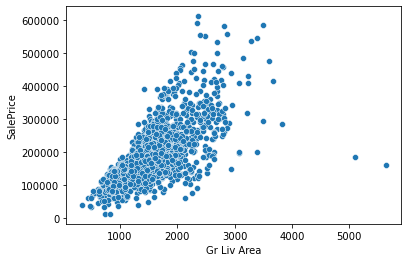

In [30]:
sns.scatterplot(data=train, y="SalePrice", x="Gr Liv Area")
#we plot a graph to look for any outliers

Since there are 2 data that are way off , we should remove those 2 data columns from the dataframe

In [31]:
train.shape
#check the shape for train

(2051, 81)

In [32]:
train['Gr Liv Area'].values[train['Gr Liv Area'] > 5000] 
#find the 2 numbers that are outliers
#we need to drop the rows that fulfil this condition 




array([5642, 5095])

In [33]:
train_cleaned = train[train['Gr Liv Area'] < 5000]
train_cleaned['Gr Liv Area']
#the 2 outliers are now dropped

train_cleaned.shape

(2049, 81)

In [34]:
test_cleaned = test
#we save the cleaned data in a new variable

In [35]:
test_cleaned.shape
#we must have 879 rows for the final submission dataset so this is correct

(879, 80)

## Data Cleaning: Export
**now that we have cleaned the data, we can export it**

In [36]:
train_cleaned.to_csv('../datasets/train_cleaned.csv')
#export train_cleaned as csv

In [37]:
test_cleaned.to_csv('../datasets/test_cleaned.csv')
#export train_cleaned as csv